In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 30m      1
31h 50m      1
33h 20m      1
30h 25m      1
4h 10m       1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [11]:
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour

In [16]:
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [17]:
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
train_data["Arr_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

In [20]:
train_data["Arr_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [21]:
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i] + " 0m"
        else:
            duration[i]="0h " + duration[i]

dur_hours=[]
dur_min=[]
for i in range(len(duration)):
    dur_hours.append(int(duration[i].split(sep="h")[0]))
    dur_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [24]:
train_data["duration_hours"]=dur_hours
train_data["duration_min"]=dur_min

In [25]:
train_data.drop(["Duration"],axis=1,inplace=True)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [27]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

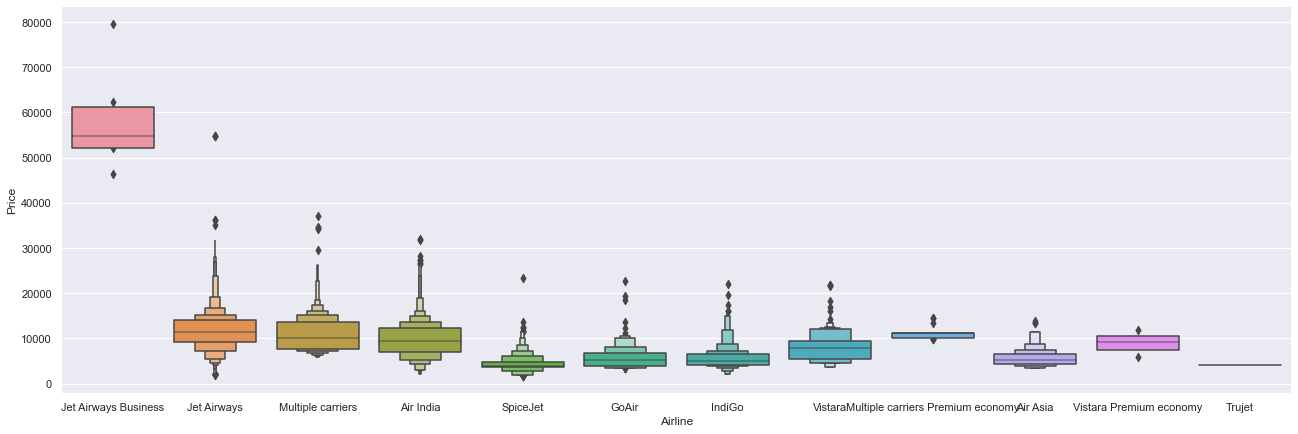

In [28]:
sns.catplot(x="Airline",y="Price",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [29]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

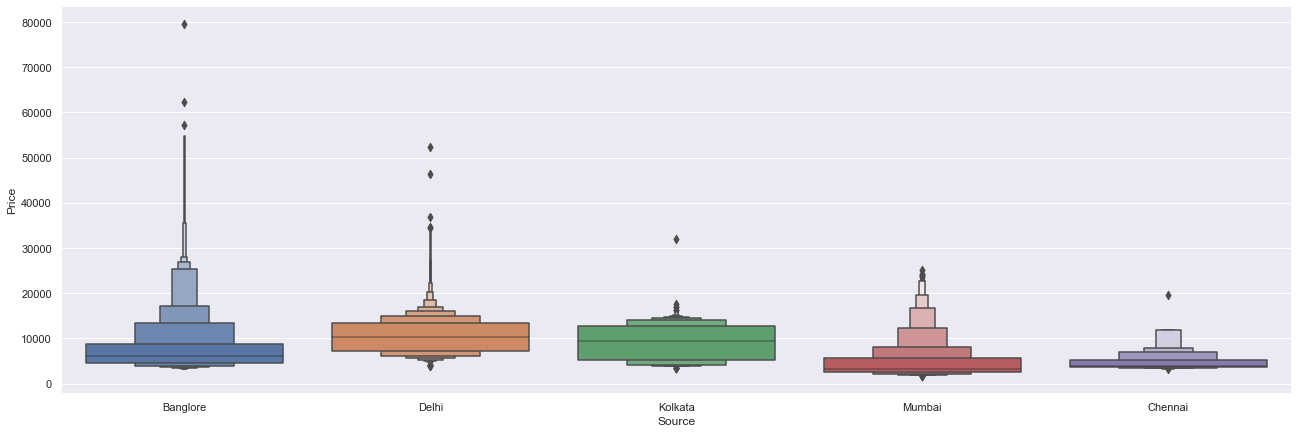

In [31]:
sns.catplot(x="Source",y="Price",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [32]:
Source=train_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [36]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [37]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [38]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int64 
 6   Journey_month   10682 non-null  int64 
 7   Dep_hour        10682 non-null  int64 
 8   Dep_min         10682 non-null  int64 
 9   Arr_hour        10682 non-null  int64 
 10  Arr_min         10682 non-null  int64 
 11  duration_hours  10682 non-null  int64 
 12  duration_min    10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [40]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [42]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [43]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [45]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.shape

(10682, 30)

# Test data

In [47]:
test_data=pd.read_excel(r"Test_set.xlsx")

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [51]:
test_data["Duration"].value_counts()
test_data.shape
test_data.dropna(inplace=True)
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [52]:
test_data["Journey_day"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [53]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [54]:
#test_data.drop(["Date_of_Journey"],axis=1,inplace=True)
#test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
#test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
#test_data.drop(["Dep_Time"],axis=1,inplace=True)

Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

Source=test_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [55]:
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [57]:
test_data["Arr_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arr_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [58]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arr_hour,Arr_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2,45


In [59]:
duration=list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i] + " 0m"
        else:
            duration[i]="0h " + duration[i]

dur_hours=[]
dur_min=[]
for i in range(len(duration)):
    dur_hours.append(int(duration[i].split(sep="h")[0]))
    dur_min.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
test_data["duration_hours"]=dur_hours
test_data["duration_min"]=dur_min

test_data.drop(["Duration"],axis=1,inplace=True)

In [60]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Journey_day,Journey_month,Arr_hour,Arr_min,duration_hours,duration_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,No info,6,6,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,No info,12,5,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,In-flight meal not included,21,5,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,No info,21,5,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,No info,24,6,2,45,2,50


In [61]:
Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [62]:
test_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)



In [63]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Journey_day,Journey_month,Arr_hour,Arr_min,duration_hours,duration_min
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,1,6,6,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,1,12,5,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,1,21,5,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,1,21,5,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,0,24,6,2,45,2,50


In [64]:
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [65]:
data_test.head()

,Date_of_Journey,Dep_Time,Total_Stops,Journey_day,Journey_month,Arr_hour,Arr_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,1,6,6,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,1,12,5,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,1,21,5,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,1,21,5,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,0,24,6,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [66]:
data_test.shape

(2671, 28)

# Feature Selection

In [67]:
data_train.shape

(10682, 30)

In [68]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'duration_hours', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [69]:
x=data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'duration_hours', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

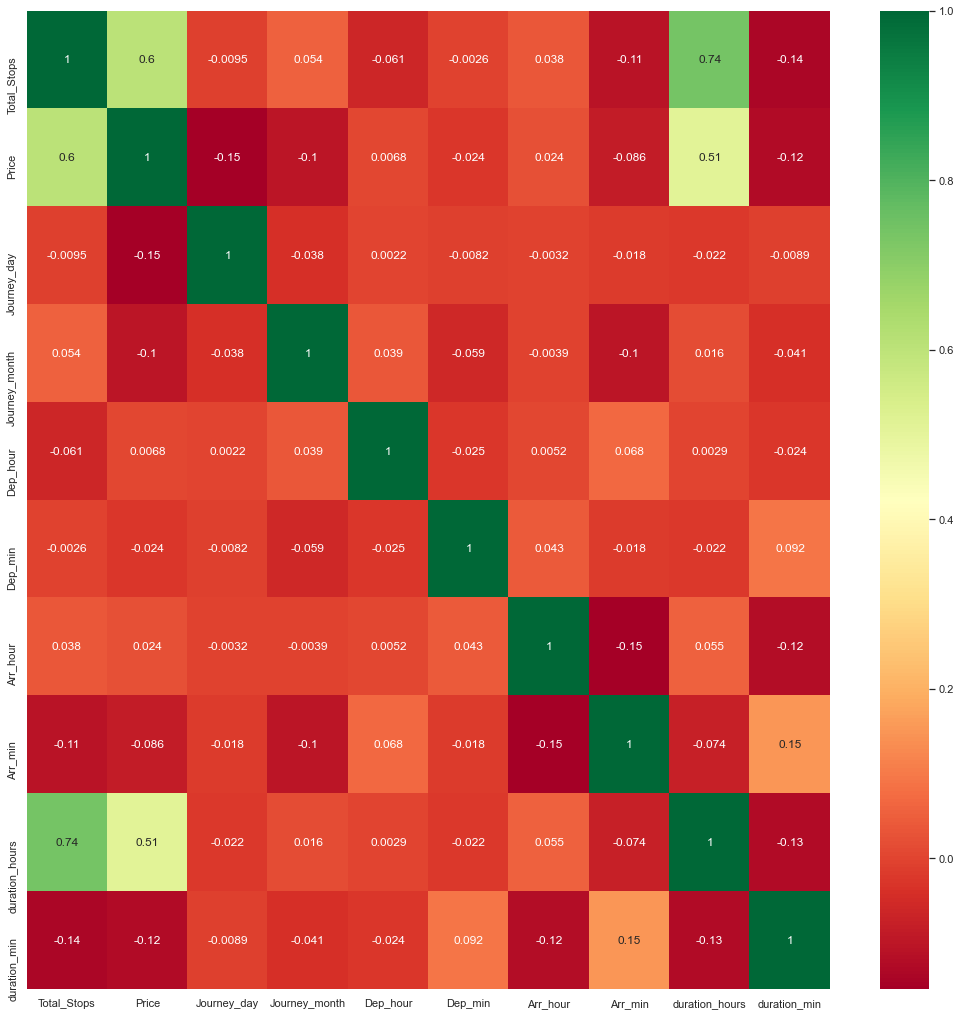

In [71]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [73]:
print(selection.feature_importances_)

[2.34431216e-01 1.43895556e-01 5.24721190e-02 2.47219438e-02
 2.13556838e-02 2.81660241e-02 1.95773766e-02 1.14315449e-01
 1.78584592e-02 1.02824920e-02 1.84735082e-03 1.79317749e-02
 1.36806674e-01 6.72699540e-02 1.83844574e-02 8.57412078e-04
 2.91676999e-03 8.44775991e-05 5.33470649e-03 8.78038753e-05
 5.38871259e-04 1.16022488e-02 2.95516089e-03 5.47273355e-03
 1.25645778e-02 1.37087270e-02 9.02802162e-03 4.92145092e-04
 2.50398132e-02]


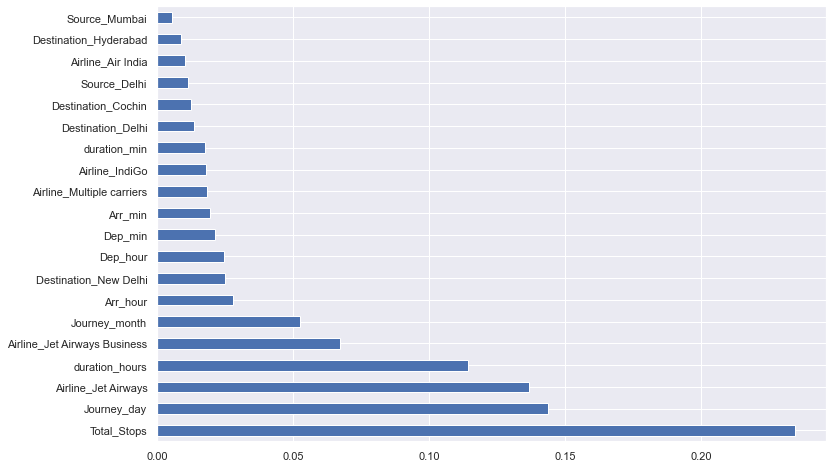

In [74]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

# Fitting a model

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
print(reg_rf.fit(x_train,y_train))

RandomForestRegressor()


In [78]:
y_pred=reg_rf.predict(x_test)

In [79]:
reg_rf.score(x_train,y_train)

0.9535203602294494

In [80]:
reg_rf.score(x_test,y_test)

0.7951367693397363

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


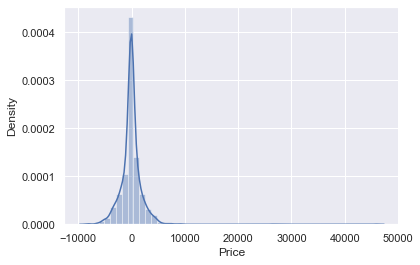

In [81]:
sns.distplot(y_test-y_pred)
plt.show()

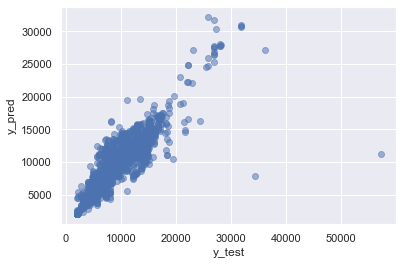

In [82]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [83]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1179.7105803809875
MSE 4417272.518246352
RMSE 2101.7308386771015


In [84]:
metrics.r2_score(y_test,y_pred)

0.7951367693397363

# HyperParameter Tunning

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [87]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [88]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [89]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:
prediction=rf_random.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


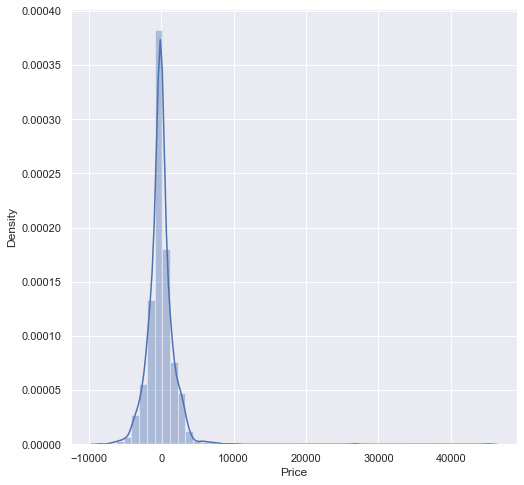

In [92]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

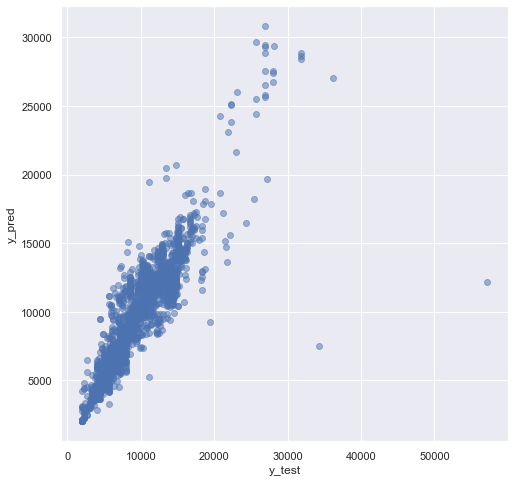

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [94]:
print("MAE",metrics.mean_absolute_error(y_test,prediction))
print("MSE",metrics.mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1166.0551856638137
MSE 4050884.473902461
RMSE 2012.6809170612369


In [95]:
metrics.r2_score(y_test,prediction)

0.8121290282799623

# Save the model to reuse it again

In [96]:
import pickle
file=open('flightpred_new.pkl','wb')
pickle.dump(rf_random,file)

In [97]:
model=open('flightpred_new.pkl','rb')
forest=pickle.load(model)

In [98]:
y_prediction=forest.predict(x_test)

In [99]:
metrics.r2_score(y_test,y_prediction)

0.8121290282799623